In [1]:
import pandas as pd
import re

In [2]:
#读取数据
user_frame = pd.read_csv('users.csv',index_col=None)
user_frame.head(2)

,user_id,screen_name,description,follow_count,followers_count,gender,verified,verified_reason,profile_url,location
0,1749268063,占星妖妖,公众：zhanxing2017,28,6056297,f,True,知名情感博主,https://m.weibo.cn/u/1749268063?uid=1749268063...,上海
1,1219795431,胡延平Future,Learner * Explorer * Connector...,1960,2326479,m,True,前 DCCI互联网数据中心创始人,https://m.weibo.cn/u/1219795431?uid=1219795431...,其他


In [3]:
# location字段整理,保留到省份
user_frame['location']=user_frame.location.fillna('其他')
def get_provience(loc):
    location = str(loc)
    location = re.findall(r"^[\u4e00-\u9fff][^' ']*",location)
    if not location:
        return '其他'
    return location[0]
user_frame['location'] = user_frame['location'].apply(get_provience)

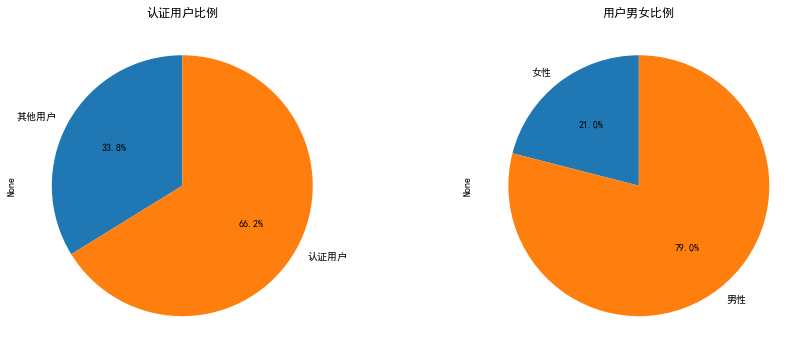

In [6]:
# 认证用户比例
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
labels = ['其他用户','认证用户']
plt.title("认证用户比例")
user_frame.groupby('verified').size().plot.pie(labels=labels,autopct='%1.1f%%',shadow=False,startangle=90)
plt.subplot(1,2,2)
labels = ['女性','男性']
plt.title("用户男女比例")
user_frame.groupby('gender').size().plot.pie(labels=labels,autopct='%1.1f%%',shadow=False,startangle=90)

可见，关注华为5g这个话题的用户以男性为主。  
并且大部分为认证用户。

In [7]:
# 根据是否认证将用户数据分为两部分
verified_users = pd.DataFrame(user_frame[user_frame['verified']==True],columns=['user_id','screen_name','followers_count','gender','location'])
other_users = pd.DataFrame(user_frame[user_frame['verified']==False],columns=['user_id','screen_name','followers_count','gender','location'])

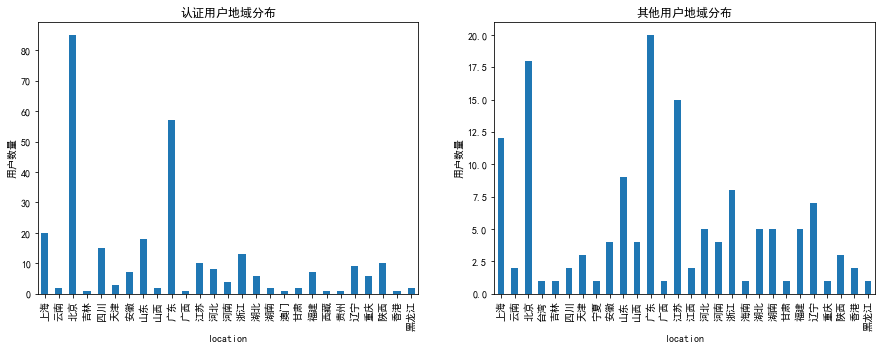

In [8]:
# 用户地域分布（国内用户去除'海外'和'其他'）
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
plt.ylabel('用户数量')
plt.title("认证用户地域分布")
verified_users.groupby('location').size().drop(['海外','其他']).plot.bar()
ax2 = plt.subplot(1,2,2)
plt.ylabel('用户数量')
plt.title("其他用户地域分布")
other_users.groupby('location').size().drop(['海外','其他']).plot.bar()

这个分布情况展示还不是很清楚，下面采用地图热力图的方式进行展示

In [10]:
#使用pyecharts在地图上通过热力图展示用户活跃区域
from pyecharts.charts import Geo
from pyecharts import options as opts
from pyecharts.globals import GeoType
user_location = dict(user_frame.groupby('location').size().drop(['海外','其他']))
# 这里需要将数据格式转换为json支持的格式
user_location= [(str(p),int(v)) for p,v in user_location.items()]
geo = Geo()
geo.add_schema()
geo.add("geo",user_location,type_=GeoType.HEATMAP)
geo.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
geo.set_global_opts(visualmap_opts=opts.VisualMapOpts(is_piecewise=False,max_=100),title_opts=opts.TitleOpts(title="认证用户地域分布"))
geo.render_notebook()


可以看到这些用户基本都分布在北京、上海、珠三角这三个区域